In [1]:
import os
import glob
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import ImageGrid, make_axes_locatable, Size, Divider

In [2]:
file_names = glob.glob('/mnt/c/Users/conor/OneDrive/Desktop/temp_extraction_new/*')

annotations = dict()

for file_name in tqdm(file_names):
    for i in [1,2]:
        try:
            annotations[f"{file_name.split('/')[-1][:-4]}"] = matplotlib.image.imread(f"/mnt/c/Users/conor/Google Drive/PHD/Project with Janet/Label_Images/TMA_{i}/{file_name.split('/')[-1][:-4]}.png")  
            continue

        except FileNotFoundError as e:

            pass
            #print(f'{file_name} not found')

In [3]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, FunctionTransformer, normalize

In [4]:
master = pd.read_excel('./master_xl.xlsx')
gb = list(master.groupby('REF'))

TMA_1_C3


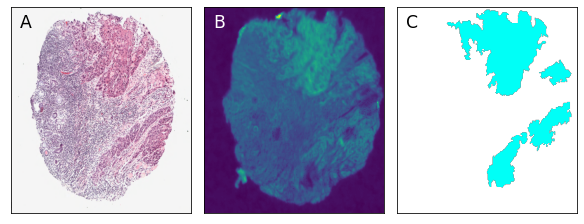

In [6]:
row = gb[16]

name = row[0]
print(name)

df1 = row[1].iloc[0,:]

ftir = pd.read_hdf(df1['FTIR'], key='Data')

ann = matplotlib.image.imread('/mnt/c/Users/conor/Google Drive/PHD/Project with Janet/Label_Images/TMA_1/TMA_1.1_C3.png')

he1 = matplotlib.image.imread(df1['HE'])



fig, axes = plt.subplots(ncols=3, figsize=(8,3), constrained_layout = True)

axes[0].imshow(he1,aspect='auto')
axes[0].text(0.05, 0.9, 'A', size='xx-large', transform=axes[0].transAxes)
axes[1].imshow(ftir.values.reshape(256,256,-1)[25:,:,195],aspect='auto')
axes[1].text(0.05, 0.9, 'B', size='xx-large', color='w', transform=axes[1].transAxes)
axes[2].imshow(ann[25:,:,:],aspect='auto')
axes[2].text(0.05, 0.9, 'C', size='xx-large', transform=axes[2].transAxes)

[(ax.set_xticks([]), ax.set_yticks([])) for ax in axes];

fig.savefig('./Prognosis_Paper_Plots/Annotation.pdf', bbox_inches='tight')


